**find the roots x^(2)+xy+y^(2)=7, x^(3)+y^(3)=9 through N-R methods.**

**1. Use autograd for jacobian**

In [15]:
import autograd as ag
from autograd import jacobian
import autograd.numpy as np
import matplotlib
import matplotlib.pyplot as plt

**2. Describe the functions** *(edit this for different problems)*

In [16]:
m = 2         # no. of equiations
n = 2         # no. of variables

# define the functions
f1 = lambda x: (x[0]**2) + (x[0]*x[1]) + (x[1]**2) - 7
f2 = lambda x: (x[0]**3) + (x[1]**3) - 9

# define the initial guesses
x0 = np.array([0.5,1.5], dtype = float).reshape(n,1)

list_x = [x0[0]]
list_y = [x0[1]]

**3. Defining jacobian functions**

In [17]:
j1 = jacobian(f1)
j2 = jacobian(f2)

**3. The N-R method for multivariables**   *(edit 'F' and 'jac' for different problems)*

In [18]:
iter = 20       # set no of iterations
e = 0.001       # set error

i  = 0

while i < iter:
  
  # edit this for different problems
  F = np.array([f1(x0),f2(x0)]).reshape(m,1)
  
  flat_x0 = x0.flatten()
  
  # edit this for different problems
  jac = np.array([j1(flat_x0),j2(flat_x0)]).reshape(n,m)


  xn = x0 - np.linalg.inv(jac)@F          # n-th prediction

  error = xn - x0

  x0 = xn
  
  list_x.append(x0[0])
  list_y.append(x0[1])

  print('\n iteration  -  ', i)
  print('error at',i,'-th iteration -- \n', error )
  print ('jacobian -- \n', jac)
  print ('F -- \n', F)
  print('___________________')

  i = i+1
  if error.all() < e:
    break

print('\n prediction after', i, 'iterations -- \n', xn)
print('\n checking with predicted values--')
print("f1  =  ", np.around(f1(xn),3))
print("f2  =  ", np.around(f2(xn),3))


 iteration  -   0
error at 0 -th iteration -- 
 [[0.4254386 ]
 [0.76754386]]
jacobian -- 
 [[2.5  3.5 ]
 [0.75 6.75]]
F -- 
 [[-3.75]
 [-5.5 ]]
___________________

 iteration  -   1
error at 1 -th iteration -- 
 [[ 0.0390309 ]
 [-0.23027269]]
jacobian -- 
 [[ 4.11842105  5.46052632]
 [ 2.56930979 15.42526547]]
F -- 
 [[1.09666436]
 [3.45173481]]
___________________

 iteration  -   2
error at 2 -th iteration -- 
 [[ 0.03426712]
 [-0.03601336]]
jacobian -- 
 [[ 3.96621018  5.03901185]
 [ 2.79060425 12.45142152]]
F -- 
 [[0.04556117]
 [0.35279161]]
___________________

 iteration  -   3
error at 3 -th iteration -- 
 [[ 0.0012618 ]
 [-0.00125623]]
jacobian -- 
 [[ 3.99873105  5.00125224]
 [ 2.99242451 12.01509847]]
F -- 
 [[0.00123712]
 [0.01131787]]
___________________

 iteration  -   4
error at 4 -th iteration -- 
 [[ 1.58191377e-06]
 [-1.58255708e-06]]
jacobian -- 
 [[ 3.99999842  5.00000158]
 [ 2.99999051 12.00001899]]
F -- 
 [[1.58513529e-06]
 [1.42449887e-05]]
___________________

**Plot Graph**

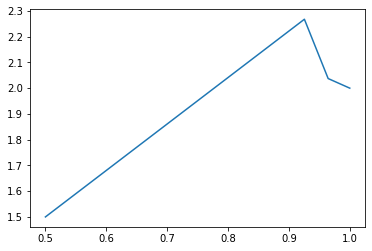

In [19]:
plt.plot(list_x,list_y)
plt.show()